# COVID19 Vaccination in Czechia

## Download datasets

In [11]:
import requests

DATASET_FILENAME = "vaccination.csv"
by_region_url = "https://onemocneni-aktualne.mzcr.cz/api/v2/covid-19/ockovani.csv"
by_region_req = requests.get(by_region_url)
with open(DATASET_FILENAME, "wb") as file:
    file.write(by_region_req.content)

## Explore dataset

In [12]:
import pandas as pd

vacc = pd.read_csv(DATASET_FILENAME)
vacc.head()

,datum,vakcina,kraj_nuts_kod,kraj_nazev,vekova_skupina,prvnich_davek,druhych_davek,celkem_davek
0,2020-12-27,Comirnaty,CZ010,Hlavní město Praha,18-24,48,0,48
1,2020-12-27,Comirnaty,CZ010,Hlavní město Praha,25-29,113,0,113
2,2020-12-27,Comirnaty,CZ010,Hlavní město Praha,30-34,103,0,103
3,2020-12-27,Comirnaty,CZ010,Hlavní město Praha,35-39,115,0,115
4,2020-12-27,Comirnaty,CZ010,Hlavní město Praha,40-44,173,0,173


In [14]:
total_vaccinations = vacc['celkem_davek'].sum()
first_doses = vacc['prvnich_davek'].sum()
second_doses = vacc['druhych_davek'].sum()
print("Total vaccinations (first and second dose):", total_vaccinations)
print("Number of people with at least first dose:", first_doses)
print("Number of people with two doses:", second_doses)

Total vaccinations (first and second dose): 862670
Number of people with at least first dose: 594930
Number of people with two doses: 267740


### How many people were vaccinated in Czechia?

In [15]:
total_population = 10_707_839 # (Sep 2020)
unvaccinated = total_population - first_doses

In [57]:
import matplotlib.pyplot as plt

def pie_chart(labels, sizes, title):
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=180)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(title)
    plt.show()
    return fig1

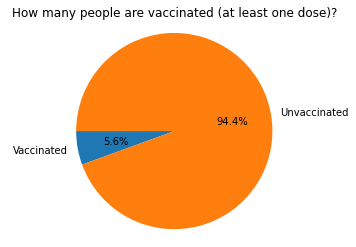

In [61]:
vacc_ratio_labels = ['Vaccinated', 'Unvaccinated']
vacc_ratio_sizes = [first_doses, unvaccinated]
vacc_ratio_title = "How many people are vaccinated (at least one dose)?"
vacc_ratio_fig = pie_chart(vacc_ratio_labels, vacc_ratio_sizes, vacc_ratio_title)
vacc_ratio_fig.savefig("vacc_ratio.png")

### What vaccines are used?

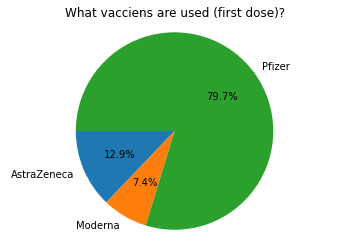

In [62]:
grouped_by_vaccine = vacc.groupby("vakcina").sum()
vacc_prod_labels = ["AstraZeneca", "Moderna", "Pfizer"]
vacc_prod_sizes = grouped_by_vaccine['prvnich_davek'].tolist()
vacc_prod_title = "What vacciens are used (first dose)?"
vacc_prod_fig = pie_chart(vacc_prod_labels, vacc_prod_sizes, vacc_prod_title)
vacc_prod_fig.savefig("vacc_prod.png")

### What age groups are vaccinated?

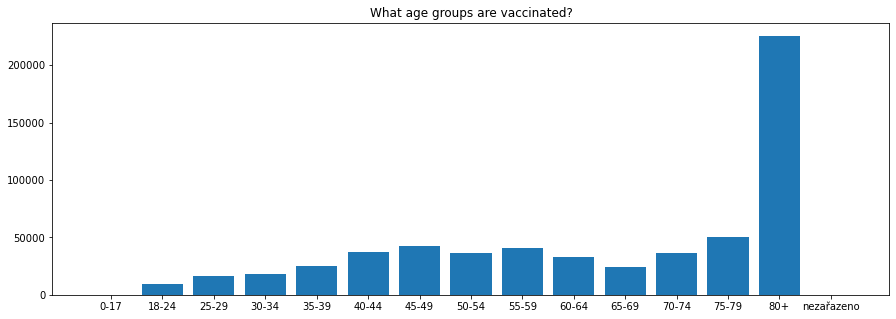

In [63]:
grouped_by_age = vacc.groupby("vekova_skupina").sum()
vacc_age_labels = grouped_by_age['prvnich_davek'].index
vacc_age_sums = grouped_by_age['prvnich_davek'].tolist()
vacc_age_fig = plt.figure(figsize=(15, 5))
plt.bar(vacc_age_labels, vacc_age_sums)
plt.title("What age groups are vaccinated?")
vacc_age_fig.savefig("age_groups.png")